# Data Handling with Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Handle import errors

Use the excel file '1-Data-errors.xlsx' to explore common data/datetime handling errors.

Practical = knowing when to python and when not to python.

In [2]:
error_df = pd.read_excel(
    r'Data\WK2-Data-errors.xlsx', 
    sheet_name='Sheet1',
    #header=1, # removes row 0, makes row 1 the headder
    #na_values=['na', '', ' '] # replaces value with NaN
    )

In [3]:
error_df

,Date_best,Date_international,Date_USA,Data_clean,Data_with_errors,Data_with_null,Header_error,Unnamed: 7
0,2020-06-03,2020-06-03,2020-03-06,3.00,x,3,3.00,NaN
1,2020-06-04,2020-06-04,2020-04-06,4.30,4.3,4.3,4.30,NaN
2,2020-07-03,2020-07-03,2020-03-07,3.55,3.55,NaN,3.55,NaN
3,2020-06-12,2020-06-12,2020-12-06,2.33,"2,33",2.33,2.33,
4,2020-04-03,2020-04-03,2020-03-04,94.00,94,na,94.00,NaN


In [4]:
error_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date_best           5 non-null      datetime64[ns]
 1   Date_international  5 non-null      datetime64[ns]
 2   Date_USA            5 non-null      datetime64[ns]
 3   Data_clean          5 non-null      float64       
 4   Data_with_errors    5 non-null      object        
 5   Data_with_null      4 non-null      object        
 6    Header_error       5 non-null      float64       
 7   Unnamed: 7          1 non-null      object        
dtypes: datetime64[ns](3), float64(2), object(3)
memory usage: 448.0+ bytes


In [5]:
# Find the offending value

test_col = error_df['Data_with_errors'].values

for value in test_col:
    try:
        float(value)
    except:
        print(value)

# Go back to excel and CTRL + F for the offending value

x
2,33


In [6]:
print(error_df['Data_clean']) # This works

0     3.00
1     4.30
2     3.55
3     2.33
4    94.00
Name: Data_clean, dtype: float64


In [7]:
#print(error_df('Header_error')) # But this does not... why?

In [8]:
# import same data as csv and look at the datetime


In [9]:
df_errors_from_csv = pd.read_csv(r'Data\WK2_Data-errors.csv')

In [10]:
df_errors_from_csv

,Date_best,Date_international,Date_USA,Data_clean,Data_with_errors,Data_with_null,Header_error,Unnamed: 7
0,3-Jun-20,03/06/20,06/03/20,3.00,x,3,3.00,NaN
1,4-Jun-20,04/06/20,06/04/20,4.30,4.3,4.3,4.30,NaN
2,3-Jul-20,03/07/20,07/03/20,3.55,3.55,NaN,3.55,NaN
3,12-Jun-20,12/06/20,06/12/20,2.33,"2,33",2.33,2.33,
4,3-Apr-20,03/04/20,04/03/20,94.00,94,na,94.00,NaN


In [11]:
df_errors_from_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date_best           5 non-null      object 
 1   Date_international  5 non-null      object 
 2   Date_USA            5 non-null      object 
 3   Data_clean          5 non-null      float64
 4   Data_with_errors    5 non-null      object 
 5   Data_with_null      4 non-null      object 
 6    Header_error       5 non-null      float64
 7   Unnamed: 7          1 non-null      object 
dtypes: float64(2), object(6)
memory usage: 448.0+ bytes


Useful blog post https://towardsdatascience.com/4-tricks-you-should-know-to-parse-date-columns-with-pandas-read-csv-27355bb2ad0e

In [14]:
df_errors_from_csv = pd.read_csv(
    r'Data/WK2_Data-errors.csv',
    parse_dates = ['Date_best','Date_international','Date_USA'] # default is to parse as US format
    )

In [ ]:
df_errors_from_csv

In [15]:
df_errors_from_csv = pd.read_csv(
    r'Data/WK2_Data-errors.csv',
    parse_dates = ['Date_best','Date_international','Date_USA'],
    dayfirst=True # switch to parse as international format
    )

In [16]:
df_errors_from_csv

,Date_best,Date_international,Date_USA,Data_clean,Data_with_errors,Data_with_null,Header_error,Unnamed: 7
0,2020-06-03,2020-06-03,2020-03-06,3.00,x,3,3.00,NaN
1,2020-06-04,2020-06-04,2020-04-06,4.30,4.3,4.3,4.30,NaN
2,2020-07-03,2020-07-03,2020-03-07,3.55,3.55,NaN,3.55,NaN
3,2020-06-12,2020-06-12,2020-12-06,2.33,"2,33",2.33,2.33,
4,2020-04-03,2020-04-03,2020-03-04,94.00,94,na,94.00,NaN


Note how in all cases the "Date_best" format worked. This format saves you and your international collaborators / clients a lot of pain. 

## Import case study data

In [17]:
well_data = pd.read_excel(r'Data\WK2_Data-case-study.xlsx', sheet_name='ops_data')

In [18]:
well_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824 entries, 0 to 1823
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1824 non-null   datetime64[ns]
 1   P-1 TMF T/hr  449 non-null    float64       
 2   P-2 TMF T/hr  1274 non-null   float64       
 3   P-3 TMF T/hr  1147 non-null   float64       
 4   I-1 TMF T/hr  1679 non-null   float64       
 5   I-2 TMF T/hr  1824 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 85.6 KB


## Quick-plot data using Pandas

**Syntax of plot()**

DataFrame.plot(x=None, y=None, **kwargs)

<AxesSubplot:>

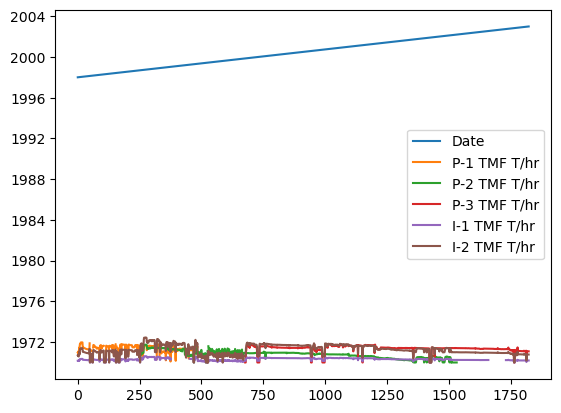

In [19]:
well_data.plot(
    #x='Date',
    )

<AxesSubplot:xlabel='Date'>

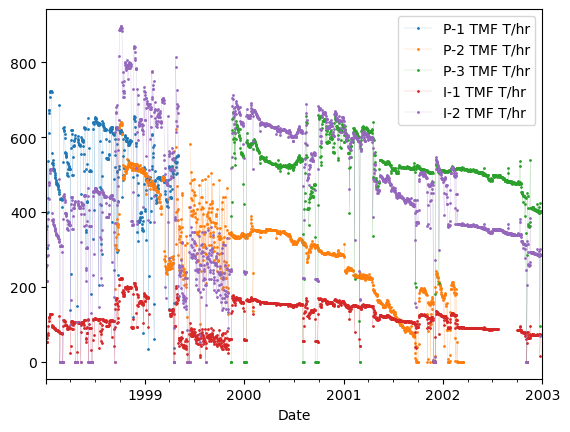

In [20]:
#well_data.plot.scatter(x='Date_daily')

well_data.plot(
    x='Date',
    marker='.',
    markersize=2,
    linewidth=0.1,
    )

In [21]:
well_data.columns

Index(['Date', 'P-1 TMF T/hr', 'P-2 TMF T/hr', 'P-3 TMF T/hr', 'I-1 TMF T/hr',
       'I-2 TMF T/hr'],
      dtype='object')

<AxesSubplot:xlabel='Date'>

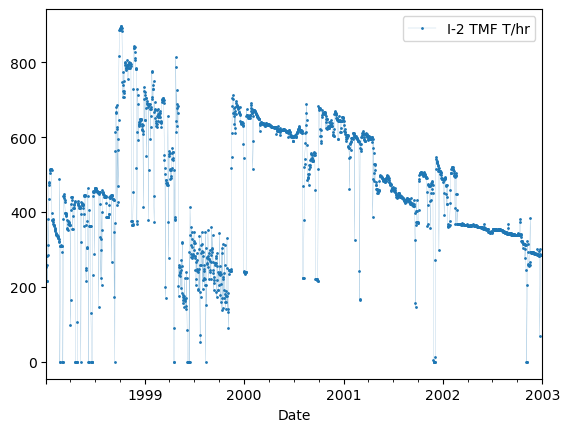

In [22]:
well_data.plot(
    x='Date',
    y=['I-2 TMF T/hr'],
    marker='.',
    markersize=2,
    linewidth=0.1,
    )

# Add grid, google kwargs

## Calculate values

Calculations can be done row-wise using the column names

In [23]:
data = [10,20,30]
df = pd.DataFrame(data, columns=['x'])
df

,x
0,10
1,20
2,30


In [24]:
df['x + 10'] = df['x'] + 10
df

,x,x + 10
0,10,20
1,20,30
2,30,40


When doing calculations there must be values in the cells (i.e., no NaN)

In [25]:
well_data['Total_prod_tph'] = well_data['P-1 TMF T/hr'].fillna(0) + well_data['P-2 TMF T/hr'].fillna(0) + well_data['P-3 TMF T/hr'].fillna(0)

well_data['Total_inj_tph'] = well_data['I-1 TMF T/hr'].fillna(0) + well_data['I-2 TMF T/hr'].fillna(0)

<AxesSubplot:xlabel='Date'>

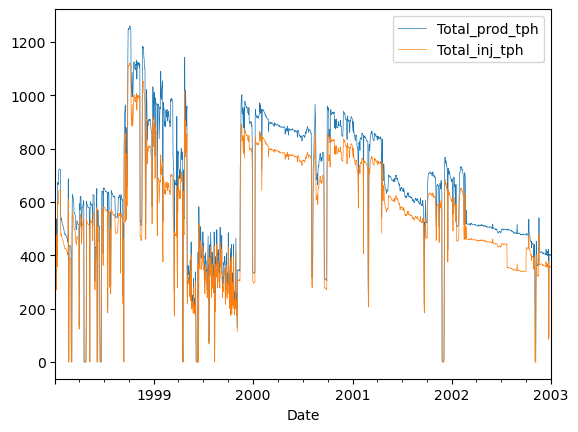

In [26]:
well_data.plot(
    x='Date', 
    y=['Total_prod_tph','Total_inj_tph'],
    linewidth=0.5
    )


## Averaging by time period

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html

- D : daily
- W : weekly
- M : month end 
- SM : semi-month end (15th and end of month)
- Q : quarter end

In [27]:

# Reassign to new object and set date the index
well_data_weekly_ave = well_data.set_index('Date')

# Resample (average) on weekly frequency
well_data_weekly_ave = well_data_weekly_ave.resample('W').mean() 

# Return the date index to be a column
well_data_weekly_ave.reset_index(inplace=True) # "inplace=True" instead of re-assignment 

display(well_data_weekly_ave.tail(3))

,Date,P-1 TMF T/hr,P-2 TMF T/hr,P-3 TMF T/hr,I-1 TMF T/hr,I-2 TMF T/hr,Total_prod_tph,Total_inj_tph
259,2002-12-22,NaN,NaN,404.959922,72.082866,288.331465,404.959922,360.414331
260,2002-12-29,NaN,NaN,357.906485,63.707354,254.829417,357.906485,318.536771
261,2003-01-05,NaN,NaN,399.872966,71.177388,284.709552,399.872966,355.886940


Text(0, 0.5, 'TMF [T/hr]')

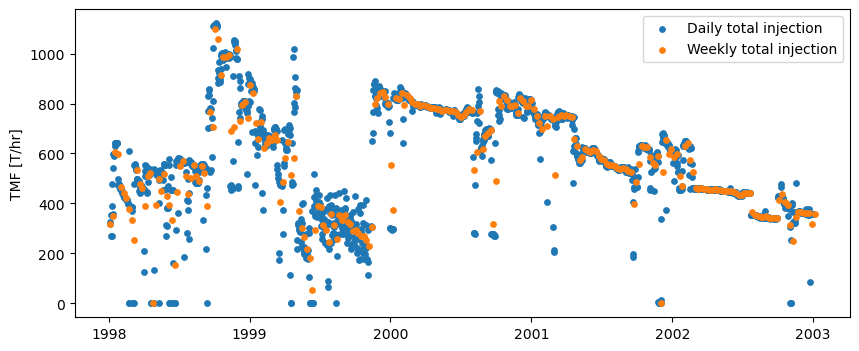

In [28]:
fig, ax = plt.subplots(1,1,figsize=(10,4))

ax.scatter(
    well_data['Date'].values,
    well_data['Total_inj_tph'].values,
    s = 15,
    label = 'Daily total injection'
)

ax.scatter(
    well_data_weekly_ave['Date'].values,
    well_data_weekly_ave['Total_inj_tph'].values,
    s = 15,
    label = 'Weekly total injection'
)

ax.legend()
ax.set_ylabel('TMF [T/hr]')


## Filter data

Make a new dataframe that meets a criteria

Select subset of columns:
    
    new_df = old_df[list of new cols] 

In [29]:
total_production = well_data_weekly_ave[['Date', 'Total_prod_tph']]

total_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            262 non-null    datetime64[ns]
 1   Total_prod_tph  262 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.2 KB


In [30]:
total_production['Exp_inj_TPH'] = total_production.Total_prod_tph * 0.85

C:\Users\Irene\AppData\Local\Temp\ipykernel_30584\1003653522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_production['Exp_inj_TPH'] = total_production.Total_prod_tph * 0.85


Select all columns based on a criteria:

    new_df = old_df[boolean statement]

In [31]:
low_total_production = total_production[total_production['Total_prod_tph'] < 300] # whats missing from here?

In [32]:
low_total_production['Exp_inj_TPH'] = low_total_production.Total_prod_tph * 0.85

C:\Users\Irene\AppData\Local\Temp\ipykernel_30584\799767224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_total_production['Exp_inj_TPH'] = low_total_production.Total_prod_tph * 0.85


## Export results

In [33]:
well_data_weekly_ave.to_csv('WK2_3-Data-weekly.csv', index=False)
#well_data_weekly_ave.to_excel('1-Data-weekly.xlsx', index=False)